In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

import sys
sys.path.insert(0, '../fem')
from gaussianrandomfields import *

In [2]:
size = 21

Text(0.5, 0, '$x$')

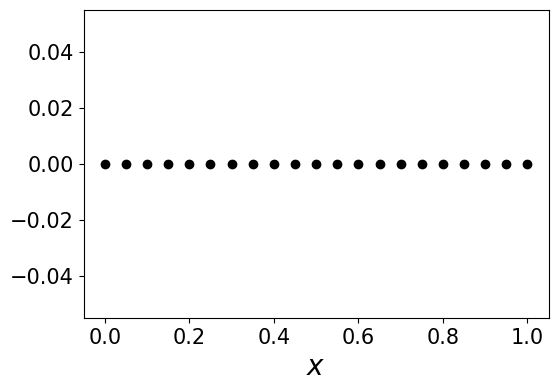

In [3]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(np.linspace(0,1,size),np.zeros(size), color='black')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
# ax.set_ylabel(r'$f_i=f(x_i)$', fontsize=size_axeslabels)
# ax.grid()

# plt.savefig("1dgrid.pdf", bbox_inches='tight')

In [4]:
x = np.linspace(0,1,size)
cov = np.zeros((size,size))
l = 0
for i in range(size):
    for j in range(size):
        cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))

/tmp/ipykernel_2240414/3859952558.py:6: RuntimeWarning: invalid value encountered in double_scalars
  cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))
/tmp/ipykernel_2240414/3859952558.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))


Text(0, 0.5, '$i$')

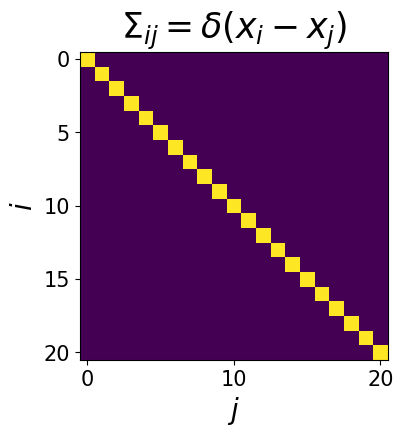

In [5]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.imshow(np.identity(size))
ax.set_title(r"$\Sigma_{ij}=\delta(x_i - x_j)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$j$', fontsize=size_axeslabels)
ax.set_ylabel(r'$i$', fontsize=size_axeslabels)

# plt.savefig("1dcovdelta.svg", bbox_inches='tight')

In [6]:
f = np.random.multivariate_normal(np.zeros(size), cov=np.identity(size), size=1)
f.shape

(1, 21)

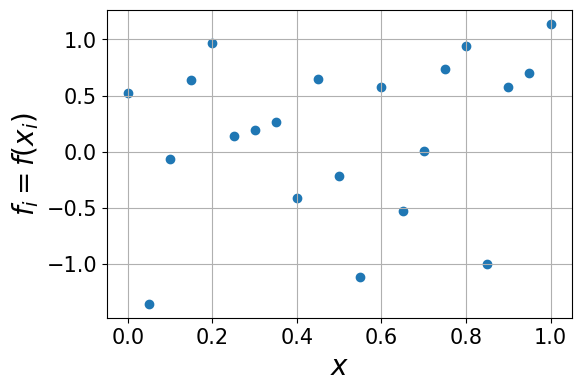

In [7]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(np.linspace(0,1,size),f.T)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$f_i=f(x_i)$', fontsize=size_axeslabels)
ax.grid()

# plt.savefig("1dgrfdelta.pdf", bbox_inches='tight')

In [109]:
l = 0.05
size = int(1/l) + 1
x = np.linspace(0,1,size)
cov = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))

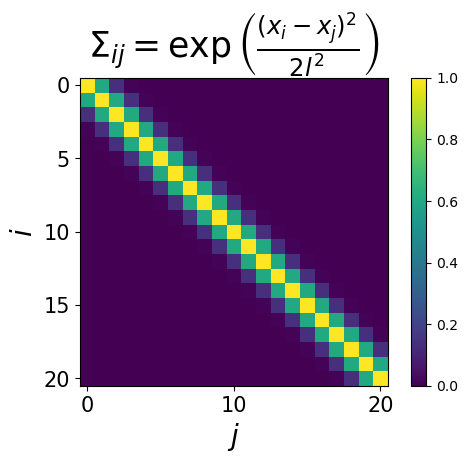

In [110]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.imshow(cov)
ax.set_title(r"$\Sigma_{ij}=\exp\left(\frac{(x_i - x_j)^2}{2l^2}\right)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$j$', fontsize=size_axeslabels)
ax.set_ylabel(r'$i$', fontsize=size_axeslabels)
plt.colorbar(fig)

# plt.savefig("1dcovgaussian.pdf", bbox_inches='tight')

In [111]:
f = np.random.multivariate_normal(np.zeros(size), cov=cov, size=1)

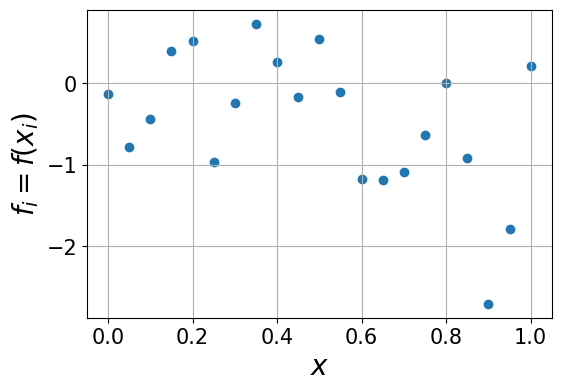

In [112]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(np.linspace(0,1,size),f.T)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$f_i=f(x_i)$', fontsize=size_axeslabels)
ax.grid()

# plt.savefig("1dgrfgaussian.svg", bbox_inches='tight')

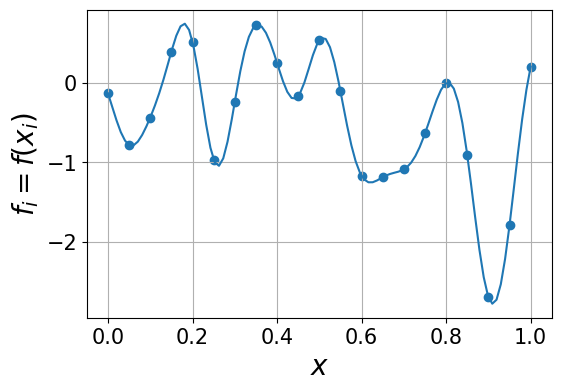

In [113]:
c = np.dot(np.linalg.inv(cov),f[0])
x_grid = x
x_variable = np.linspace(0,1,100)

size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(np.linspace(0,1,size),f.T)
ax.plot(np.linspace(0,1,len(x_variable)),np.sum(c[:,None]*np.exp(-(x_variable[None,:] - x_grid[:,None])**2/(2*l**2)), axis=0))
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$f_i=f(x_i)$', fontsize=size_axeslabels)
ax.grid()

# plt.savefig("1dgrfgaussian.svg", bbox_inches='tight')

In [93]:
GRF = f

GRF = GRF.flatten()
function = Rbf(x, GRF, function='gaussian', epsilon=0.2)

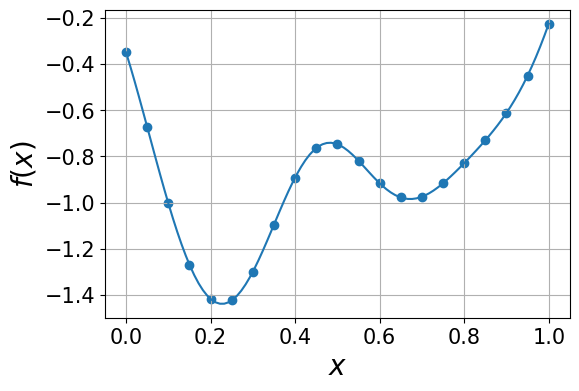

In [114]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

x_plot = np.linspace(0,1,100)
ax.plot(x_plot, function(x_plot))
fig = ax.scatter(np.linspace(0,1,size),f.T)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$f(x)$', fontsize=size_axeslabels)
ax.grid()

# plt.savefig("1dRBFint.pdf", bbox_inches='tight')

In [115]:
size = 21
X, Y = np.mgrid[0:1:size*1j, 0:1:size*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T
x.shape

(441, 2)

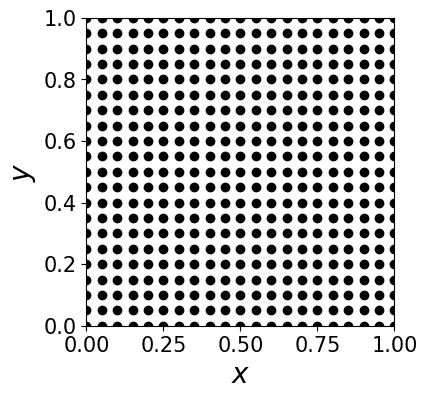

In [116]:
fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(x[:,0], x[:,1], color='black')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')

# plt.savefig("2dgrid.pdf", bbox_inches='tight')

Text(0, 0.5, '$i$')

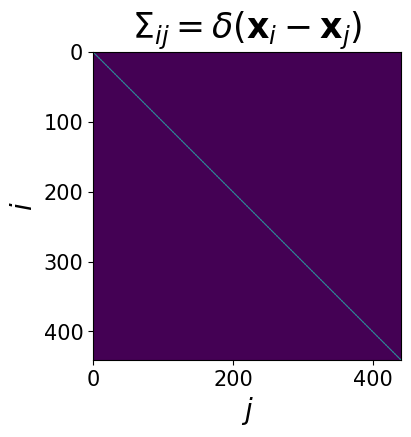

In [117]:
size=21
cov = np.identity(size**2)

size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.imshow(cov)
ax.set_title(r"$\Sigma_{ij}=\delta(\mathbf{x}_i - \mathbf{x}_j)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$j$', fontsize=size_axeslabels)
ax.set_ylabel(r'$i$', fontsize=size_axeslabels)

# plt.savefig("2dcovdelta.svg", bbox_inches='tight')

In [118]:
N_gridpoints = size
f = np.random.multivariate_normal(np.zeros(N_gridpoints**2), cov=cov, size=1)
# Deltaf = np.amax(f) - np.amin(f)
# f = f/Deltaf*0.97
# f = f - np.amin(f) + 0.02
# f = f.flatten()

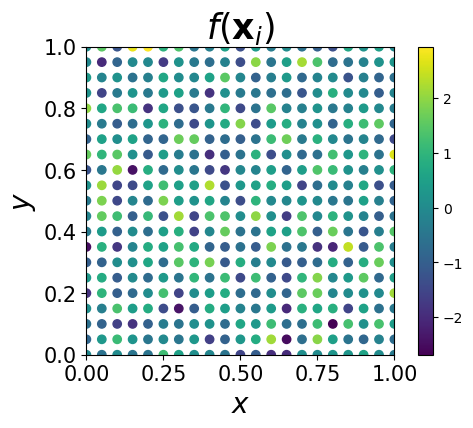

In [119]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(x[:,0], x[:,1], c=f)
ax.set_title(r"$f(\mathbf{x}_i)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("2dgrfdelta.svg", bbox_inches='tight')

In [120]:
N_gridpoints = 21
l = 0.2
#Compute covariance matrix of points on a grid
X, Y = np.mgrid[0:1:N_gridpoints*1j, 0:1:N_gridpoints*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T
cov = np.zeros((N_gridpoints**2,N_gridpoints**2))
for i in range(N_gridpoints**2):
    for j in range(N_gridpoints**2):
        cov[i,j] = np.exp(-np.sum((x[i] - x[j])**2, axis=-1)/(2*l**2))

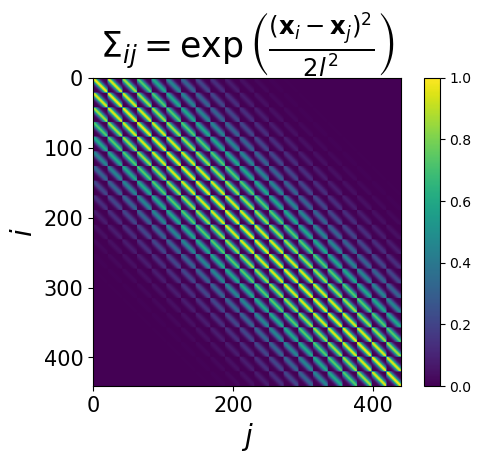

In [121]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.imshow(cov)
ax.set_title(r"$\Sigma_{ij}=\exp\left(\frac{(\mathbf{x}_i - \mathbf{x}_j)^2}{2l^2}\right)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$j$', fontsize=size_axeslabels)
ax.set_ylabel(r'$i$', fontsize=size_axeslabels)
plt.colorbar(fig)

# plt.savefig("2dcovgaussian.svg", bbox_inches='tight')

In [122]:
f = np.random.multivariate_normal(np.zeros(N_gridpoints**2), cov=cov, size=1)
# Deltaf = np.amax(f) - np.amin(f)
# f = f/Deltaf*0.97
# f = f - np.amin(f) + 0.02
# f = f.flatten()

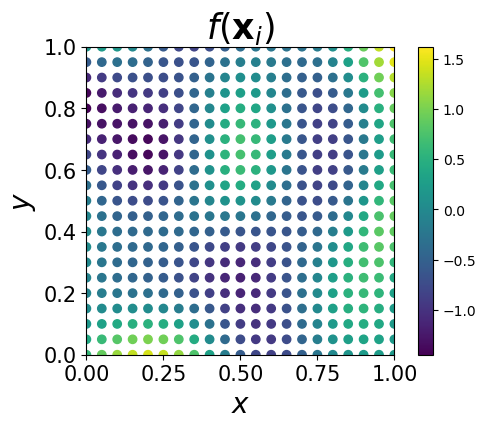

In [123]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(x[:,0], x[:,1], c=f)
ax.set_title(r"$f(\mathbf{x}_i)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("2dgrfgaussian.pdf", bbox_inches='tight')

In [124]:
from scipy.interpolate import RBFInterpolator
from scipy.interpolate import Rbf

In [125]:
function = Rbf(x[:,0], x[:,1], f, function='gaussian', epsilon=0.2)
print(function)
X, Y = np.mgrid[0:1:100*1j, 0:1:100*1j]
x_i = np.vstack([X.ravel(), Y.ravel()]).T
print(x_i.shape)
f_i = function(x_i[:,0], x_i[:,1])
f_i.shape

(10000, 2)


(10000,)

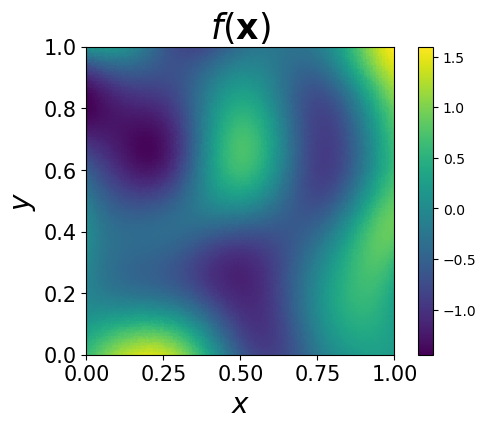

In [126]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x_i[:,0], x_i[:,1], f_i)
ax.set_title(r"$f(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("2dRBFint.svg", bbox_inches='tight')

In [135]:
function = GRF2D(N_gridpoints=21,l=0.4,positive=True)
x = np.array([0.1])
y = np.array([0.3])
function(x,y)

array([0.89367223])